# PPAC Analysis Notebook

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Load Data

In [2]:
data_dir = 'correlations/test'
data_paths = {
    "coincident": Path(f"{data_dir}/coincident_imp.pkl"),
    "decay_candidates": Path(f"{data_dir}/decay_candidates.pkl"),
    "final_correlated": Path(f"{data_dir}/final_correlated.pkl"),
}
data = {}
for name, path in data_paths.items():
    if path.exists():
        data[name] = pd.read_pickle(path)
        print(f"Loaded {name}: {len(data[name])} rows")
    else:
        print(f"File {path} not found")

Loaded coincident: 139567 rows
Loaded decay_candidates: 18346 rows
Loaded final_correlated: 3318 rows


## Basic Inspection

In [3]:
for name, df in data.items():
    display(df.head())

,imp_timetag,imp_x,imp_y,imp_tagx,imp_tagy,imp_nfile,imp_tdelta,imp_nX,imp_nY,imp_xE,...,dt_anodeH_ps,dt_cathode_ns,dt_anodeV_ns,dt_anodeH_ns,dt_cathode_us,dt_anodeV_us,dt_anodeH_us,dt_anodeH_us_corr,dt_anodeV_us_corr,dt_cathode_us_corr
0,114069384001,167,26,114069384001,114069266997,0,117004,1,1,297.505693,...,-1612920,-1608.423,-1612.374,-1612.920,-1.608423,-1.612374,-1.612920,-1.612920,-1.612374,-1.608423
1,298242188757,145,2,298242188757,298242042241,0,146516,1,1,21396.981181,...,-1505967,-1499.296,-1502.792,-1505.967,-1.499296,-1.502792,-1.505967,-1.505967,-1.502792,-1.499296
2,423541662466,132,3,423541662466,423541577001,0,85465,2,1,26593.859316,...,-1456165,-1451.863,-1458.009,-1456.165,-1.451863,-1.458009,-1.456165,-1.456165,-1.458009,-1.451863
3,427195899994,134,46,427195899994,427195795432,0,104562,2,1,3632.033098,...,-1507778,-1500.493,-1505.327,-1507.778,-1.500493,-1.505327,-1.507778,-1.507778,-1.505327,-1.500493
4,500345016559,54,6,500345016559,500344989810,0,26749,1,1,4739.239575,...,-1411053,-1405.166,-1413.130,-1411.053,-1.405166,-1.413130,-1.411053,-1.411053,-1.413130,-1.405166


,t,x,y,tagx,tagy,nfile,xboard,yboard,tdelta,nX,nY,xE,yE,event_type,recoil_index,recoil_time_sec,ppac_flag,is_clean,log_dt
0,1.373042,167,26,1373041506996,1373041403996,0,0,7,103000,1,1,350.437596,412.680526,imp,0,0.114069,both,False,0.230296
1,12.567435,111,13,12567434546998,12567434488001,0,2,6,58997,2,1,851.398672,1021.281070,imp,12,1.568398,both,False,2.397808
2,17.986490,111,13,17986490160999,17986490043996,0,2,6,117003,1,1,472.716426,432.758662,imp,12,1.568398,both,False,2.798384
3,2.121985,146,51,2121984931997,2121984835997,0,1,6,96000,1,2,725.733986,501.522354,imp,16,1.742098,both,False,-0.967881
4,3.295926,71,29,3295926304999,3295926197994,0,2,6,107005,1,1,368.323791,380.706018,imp,17,1.960019,both,False,0.289610


,recoil_x,recoil_y,recoil_xE,timetag,cathode_timetag,cathode_energy,anodeV_timetag,anodeV_energy,anodeH_timetag,anodeH_energy,...,alpha1_x,alpha1_y,alpha1_t,alpha1_xE,alpha1_dt,alpha2_x,alpha2_y,alpha2_t,alpha2_xE,alpha2_dt
0,102.0,24.0,4547.865805,1.407970e+13,1.407970e+13,4134.0,1.407970e+13,1135.0,1.407970e+13,1365.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35.0,6.0,4643.737750,1.448635e+13,1.448635e+13,3753.0,1.448635e+13,1113.0,1.448635e+13,1098.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,97.0,16.0,6584.788040,2.461723e+13,2.461722e+13,5061.0,2.461722e+13,1172.0,2.461722e+13,1955.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55.0,20.0,6836.713412,3.876345e+13,3.876345e+13,3644.0,3.876345e+13,1071.0,3.876345e+13,929.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,56.0,9.0,7358.171979,5.703475e+13,5.703475e+13,3900.0,5.703475e+13,728.0,5.703475e+13,1783.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## REA
Plot a histogram of recoil energies from the coincident events.

,recoil_x,recoil_y,recoil_xE,timetag,cathode_timetag,cathode_energy,anodeV_timetag,anodeV_energy,anodeH_timetag,anodeH_energy,...,alpha1_x,alpha1_y,alpha1_t,alpha1_xE,alpha1_dt,alpha2_x,alpha2_y,alpha2_t,alpha2_xE,alpha2_dt
1368,51.0,30.0,4997.934224,5.547434e+15,5.547434e+15,2973.0,5.547434e+15,1179.0,5.547434e+15,402.0,...,51.0,30.0,5548.364537,8219.685524,0.671410,NaN,NaN,NaN,NaN,NaN
1369,47.0,9.0,3990.128535,7.940487e+15,7.940487e+15,3850.0,7.940487e+15,1058.0,7.940487e+15,1243.0,...,47.0,9.0,7947.898292,8226.335140,6.659967,NaN,NaN,NaN,NaN,NaN
3210,66.0,50.0,6865.622894,2.056732e+15,2.056732e+15,3565.0,2.056732e+15,891.0,2.056732e+15,1243.0,...,66.0,50.0,2060.357126,8262.849793,3.352916,NaN,NaN,NaN,NaN,NaN
3211,95.0,48.0,6631.552241,2.168259e+15,2.168259e+15,4321.0,2.168259e+15,1134.0,2.168259e+15,1425.0,...,95.0,48.0,2171.307092,8262.400876,0.928668,NaN,NaN,NaN,NaN,NaN
3212,131.0,35.0,4857.732852,5.162223e+15,5.162223e+15,2860.0,5.162223e+15,861.0,5.162223e+15,550.0,...,131.0,35.0,5167.089910,8282.479414,0.912240,NaN,NaN,NaN,NaN,NaN
3213,53.0,15.0,7033.510600,5.363413e+15,5.363413e+15,3001.0,5.363413e+15,893.0,5.363413e+15,728.0,...,53.0,15.0,5367.426728,8273.238226,3.602669,NaN,NaN,NaN,NaN,NaN
3214,38.0,35.0,5266.885503,7.204479e+15,7.204479e+15,3261.0,7.204479e+15,760.0,7.204479e+15,1155.0,...,38.0,35.0,7213.084778,8215.435157,3.253274,NaN,NaN,NaN,NaN,NaN
3215,21.0,49.0,6083.557522,7.795087e+15,7.795087e+15,4002.0,7.795087e+15,1400.0,7.795087e+15,876.0,...,21.0,49.0,7796.093374,8191.303893,0.788305,NaN,NaN,NaN,NaN,NaN
3216,95.0,45.0,5896.663659,7.849863e+15,7.849863e+15,4405.0,7.849863e+15,806.0,7.849863e+15,2008.0,...,95.0,45.0,7855.864357,8252.333909,1.844215,NaN,NaN,NaN,NaN,NaN
3217,57.0,23.0,5856.755725,8.564611e+15,8.564611e+15,2671.0,8.564611e+15,539.0,8.564611e+15,910.0,...,57.0,23.0,8567.657676,8227.054140,2.816817,NaN,NaN,NaN,NaN,NaN


11


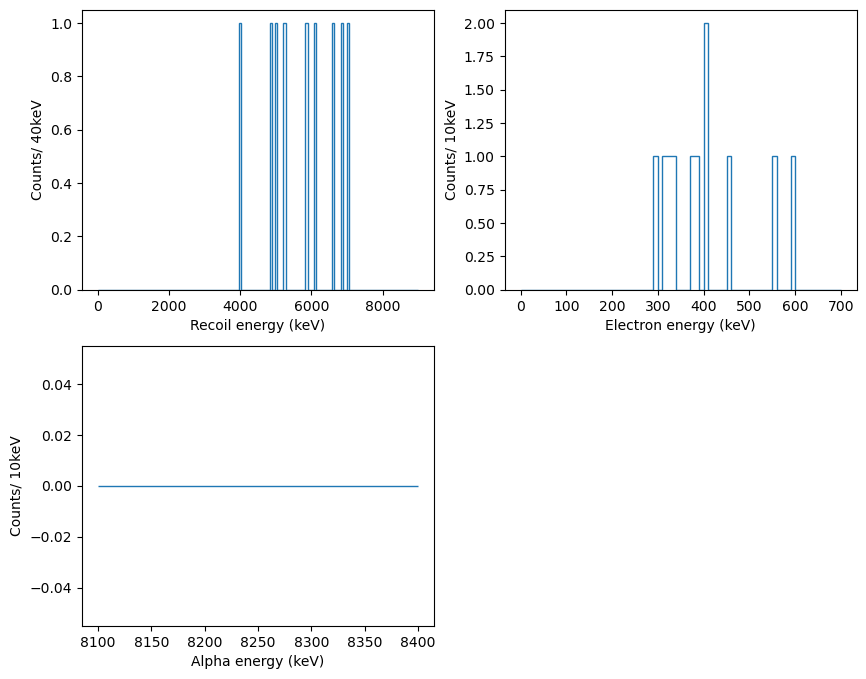

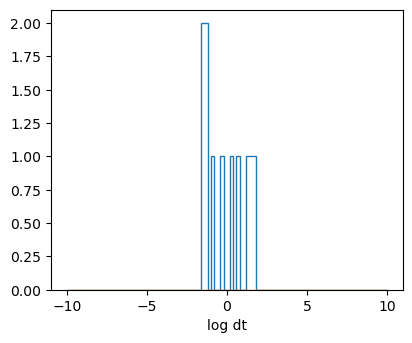

In [4]:
# Inspect
df = data["final_correlated"]
df_REA = df[df["chain"] == "REA"]
display(df_REA)
print(len(df_REA))

# plotting
# Plotting

if len(df_REA) >0:
    
    # Energies
    plt.figure(figsize=(10,8))
    plt.subplot(221)
    plt.hist(df_REA['recoil_xE'], histtype='step',bins=175, range=(0,9000))
    plt.xlabel('Recoil energy (keV)')
    plt.ylabel(r'Counts/ 40keV')
    plt.subplot(222)
    plt.hist(df_REA['electron_xE'], histtype='step',bins=70, range=(0,700))
    plt.xlabel('Electron energy (keV)')
    plt.ylabel(r'Counts/ 10keV')
    plt.subplot(223)
    plt.hist(df_REA['alpha_xE'], histtype='step', bins=60, range=(8100,8400))
    plt.xlabel('Alpha energy (keV)')
    plt.ylabel(r'Counts/ 10keV')
    plt.show()
    plt.close()
    
    # KHS plots 
    plt.figure(figsize=(10,8))
    plt.subplot(221)
    plt.hist(np.log(np.abs(df_REA['electron_t']-df_REA[r'recoil_t'])), histtype='step', bins =100, range=(-10,10))
    plt.xlabel('log dt')
    plt.subplot(221)
    plt.hist(np.log(np.abs(df_REA['alpha_t']-df_REA[r'recoil_t'])), histtype='step', bins =100, range=(-10,10))

# RE

,recoil_x,recoil_y,recoil_xE,timetag,cathode_timetag,cathode_energy,anodeV_timetag,anodeV_energy,anodeH_timetag,anodeH_energy,...,alpha1_x,alpha1_y,alpha1_t,alpha1_xE,alpha1_dt,alpha2_x,alpha2_y,alpha2_t,alpha2_xE,alpha2_dt
305,3.0,23.0,6419.554858,1.567838e+13,1.567838e+13,2075.0,1.567838e+13,602.0,1.567838e+13,387.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306,15.0,5.0,7094.020300,1.754559e+13,1.754558e+13,4130.0,1.754558e+13,1301.0,1.754558e+13,1091.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,6.0,57.0,6643.905604,4.947046e+13,4.947046e+13,2925.0,4.947046e+13,604.0,4.947046e+13,1122.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308,24.0,28.0,7796.753384,6.246508e+13,6.246508e+13,3487.0,6.246508e+13,815.0,6.246508e+13,1225.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309,50.0,52.0,7708.898292,6.300547e+13,6.300546e+13,4379.0,6.300546e+13,883.0,6.300546e+13,2119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205,96.0,10.0,2113.020519,1.111556e+16,1.111556e+16,2657.0,1.111556e+16,479.0,1.111556e+16,806.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3206,31.0,45.0,2810.419805,1.111856e+16,1.111856e+16,1982.0,1.111856e+16,796.0,1.111856e+16,208.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3207,1.0,29.0,4215.993734,1.112377e+16,1.112377e+16,2663.0,1.112377e+16,1282.0,1.112377e+16,247.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3208,79.0,18.0,7788.831029,1.112574e+16,1.112574e+16,3963.0,1.112574e+16,1991.0,1.112574e+16,515.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2472


Text(0, 0.5, 'Counts/ 10keV')

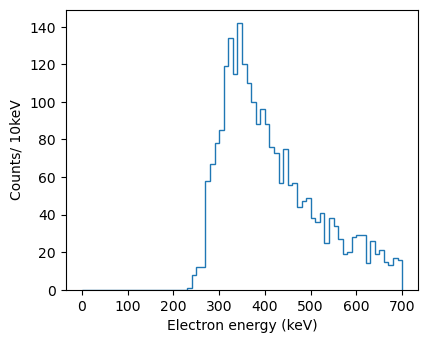

In [5]:
df = data["final_correlated"]
df_RE = df[df["chain"] == "RE"]
display(df_RE)
print(len(df_RE))
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.hist(df_RE['electron_xE'], histtype='step',bins=70, range=(0,700))
plt.xlabel('Electron energy (keV)')
plt.ylabel(r'Counts/ 10keV')

# RA

,recoil_x,recoil_y,recoil_xE,timetag,cathode_timetag,cathode_energy,anodeV_timetag,anodeV_energy,anodeH_timetag,anodeH_energy,...,alpha1_x,alpha1_y,alpha1_t,alpha1_xE,alpha1_dt,alpha2_x,alpha2_y,alpha2_t,alpha2_xE,alpha2_dt
0,102.0,24.0,4547.865805,1.407970e+13,1.407970e+13,4134.0,1.407970e+13,1135.0,1.407970e+13,1365.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35.0,6.0,4643.737750,1.448635e+13,1.448635e+13,3753.0,1.448635e+13,1113.0,1.448635e+13,1098.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,97.0,16.0,6584.788040,2.461723e+13,2.461722e+13,5061.0,2.461722e+13,1172.0,2.461722e+13,1955.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55.0,20.0,6836.713412,3.876345e+13,3.876345e+13,3644.0,3.876345e+13,1071.0,3.876345e+13,929.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,56.0,9.0,7358.171979,5.703475e+13,5.703475e+13,3900.0,5.703475e+13,728.0,5.703475e+13,1783.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,96.0,17.0,3063.270513,6.227963e+13,6.227963e+13,3961.0,6.227963e+13,1500.0,6.227963e+13,785.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,99.0,45.0,5831.703792,1.017538e+14,1.017538e+14,4308.0,1.017538e+14,542.0,1.017538e+14,2388.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,38.0,34.0,5360.988151,1.458354e+14,1.458354e+14,2044.0,1.458354e+14,263.0,1.458354e+14,878.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,136.0,21.0,4926.436787,2.341152e+14,2.341152e+14,3564.0,2.341152e+14,1867.0,2.341152e+14,378.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


638


Text(0, 0.5, 'Counts/ 40keV')

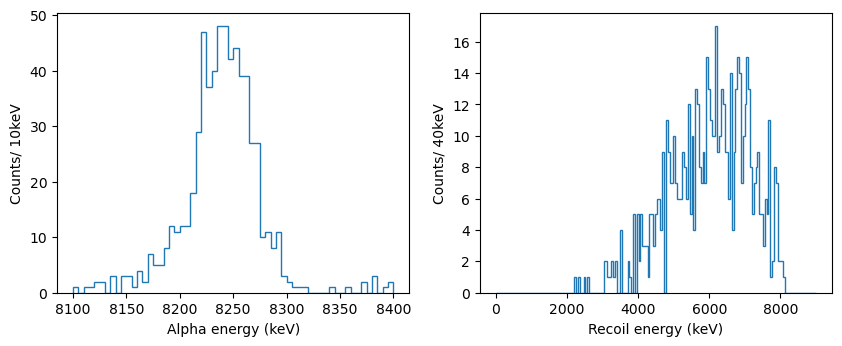

In [6]:
df = data["final_correlated"]
df_RA = df[df["chain"] == "RA"]
display(df_RA.iloc[:9])
print(len(df_RA))
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.hist(df_RA['alpha_xE'], histtype='step', bins=60, range=(8100,8400))
plt.xlabel('Alpha energy (keV)')
plt.ylabel(r'Counts/ 10keV')

plt.subplot(222)
plt.hist(df_RA['recoil_xE'], histtype='step',bins=175, range=(0,9000))
plt.xlabel('Recoil energy (keV)')
plt.ylabel(r'Counts/ 40keV')

# RAA

In [7]:
df_RAA = df[df['chain']=='RAA']
display(df_RAA)

,recoil_x,recoil_y,recoil_xE,timetag,cathode_timetag,cathode_energy,anodeV_timetag,anodeV_energy,anodeH_timetag,anodeH_energy,...,alpha1_x,alpha1_y,alpha1_t,alpha1_xE,alpha1_dt,alpha2_x,alpha2_y,alpha2_t,alpha2_xE,alpha2_dt
1370,55.0,20.0,6836.713412,3.876345e+13,3.876345e+13,3644.0,3.876345e+13,1071.0,3.876345e+13,929.0,...,55.0,20.0,39.740260,8220.962563,0.976812,55.0,20.0,119.013235,7399.797812,79.272976
1371,56.0,9.0,7358.171979,5.703475e+13,5.703475e+13,3900.0,5.703475e+13,728.0,5.703475e+13,1783.0,...,56.0,9.0,57.827716,8223.843448,0.792969,56.0,9.0,332.131319,7424.299660,274.303603
1372,64.0,43.0,6868.210224,3.562860e+14,3.562860e+14,4215.0,3.562860e+14,991.0,3.562860e+14,1389.0,...,64.0,43.0,358.989201,8266.903805,2.703194,64.0,43.0,375.579802,7344.403622,16.590601
1373,86.0,33.0,6401.587531,7.660136e+14,7.660136e+14,4009.0,7.660136e+14,961.0,7.660136e+14,1425.0,...,86.0,33.0,767.920528,8217.923160,1.906955,86.0,33.0,928.707311,7413.091727,160.786783
1374,91.0,24.0,7203.681931,1.091703e+15,1.091703e+15,3327.0,1.091703e+15,1131.0,1.091703e+15,694.0,...,91.0,24.0,1096.815013,8251.761531,5.111544,91.0,24.0,1478.548297,7394.779151,381.733284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308,77.0,26.0,5816.030013,1.017890e+16,1.017890e+16,3789.0,1.017890e+16,942.0,1.017890e+16,1103.0,...,77.0,26.0,10180.015656,8234.940673,1.110717,77.0,26.0,10273.562087,7409.825532,93.546431
3309,103.0,25.0,4999.516763,1.044824e+16,1.044824e+16,4216.0,1.044824e+16,1049.0,1.044824e+16,1521.0,...,103.0,25.0,10456.047699,8274.720370,7.803973,103.0,25.0,10573.204983,7419.617950,117.157284
3310,130.0,31.0,2250.888932,1.066756e+16,1.066756e+16,5438.0,1.066756e+16,1191.0,1.066756e+16,2643.0,...,130.0,31.0,10667.716570,8219.105757,0.160174,130.0,31.0,11093.458647,7370.152952,425.742076
3311,104.0,34.0,4792.059144,1.068432e+16,1.068432e+16,4128.0,1.068432e+16,1838.0,1.068432e+16,572.0,...,104.0,34.0,10686.975196,8251.137149,2.655537,104.0,34.0,10767.314100,7410.375413,80.338904


Text(0, 0.5, 'Counts/ 10keV')

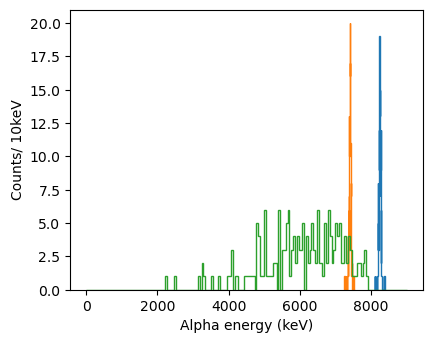

In [8]:
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.hist(df_RAA['alpha1_xE'], histtype='step', bins=60, range=(8100,8400))
plt.hist(df_RAA['alpha2_xE'], histtype='step', bins=60, range=(7250,7550))
plt.hist(df_RAA['recoil_xE'], histtype='step',bins=175, range=(0,9000))
plt.xlabel('Alpha energy (keV)')
plt.ylabel(r'Counts/ 10keV')

# REAA

In [9]:
df_REAA = df[df['chain']=='REAA']
display(df_REAA)

,recoil_x,recoil_y,recoil_xE,timetag,cathode_timetag,cathode_energy,anodeV_timetag,anodeV_energy,anodeH_timetag,anodeH_energy,...,alpha1_x,alpha1_y,alpha1_t,alpha1_xE,alpha1_dt,alpha2_x,alpha2_y,alpha2_t,alpha2_xE,alpha2_dt
1467,51.0,30.0,4997.934224,5.547434e+15,5.547434e+15,2973.0,5.547434e+15,1179.0,5.547434e+15,402.0,...,51.0,30.0,5548.364537,8219.685524,0.671410,51.0,30.0,5855.397362,7356.965479,307.032825
3313,95.0,48.0,6631.552241,2.168259e+15,2.168259e+15,4321.0,2.168259e+15,1134.0,2.168259e+15,1425.0,...,95.0,48.0,2171.307092,8262.400876,0.928668,95.0,48.0,2478.801350,7436.909592,307.494258
3314,131.0,35.0,4857.732852,5.162223e+15,5.162223e+15,2860.0,5.162223e+15,861.0,5.162223e+15,550.0,...,131.0,35.0,5167.089910,8282.479414,0.912240,131.0,35.0,5674.883714,7424.793322,507.793805
3315,53.0,15.0,7033.510600,5.363413e+15,5.363413e+15,3001.0,5.363413e+15,893.0,5.363413e+15,728.0,...,53.0,15.0,5367.426728,8273.238226,3.602669,53.0,15.0,5943.225137,7427.424056,575.798409
3316,38.0,35.0,5266.885503,7.204479e+15,7.204479e+15,3261.0,7.204479e+15,760.0,7.204479e+15,1155.0,...,38.0,35.0,7213.084778,8215.435157,3.253274,38.0,35.0,7253.998034,7395.957926,40.913256
3317,21.0,49.0,6083.557522,7.795087e+15,7.795087e+15,4002.0,7.795087e+15,1400.0,7.795087e+15,876.0,...,21.0,49.0,7796.093374,8191.303893,0.788305,21.0,49.0,7923.859787,7390.869106,127.766413


Text(0, 0.5, 'Counts/ 10keV')

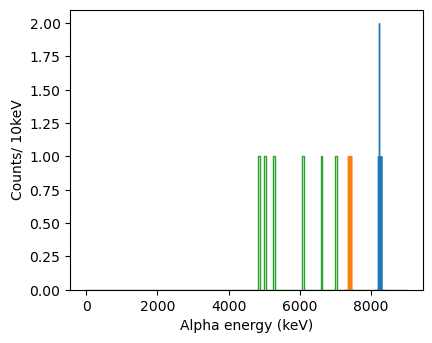

In [10]:
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.hist(df_REAA['alpha1_xE'], histtype='step', bins=60, range=(8100,8400))
plt.hist(df_REAA['alpha2_xE'], histtype='step', bins=60, range=(7250,7550))
plt.hist(df_REAA['recoil_xE'], histtype='step',bins=175, range=(0,9000))
plt.xlabel('Alpha energy (keV)')
plt.ylabel(r'Counts/ 10keV')